In [1]:
# C√†i ƒë·∫∑t n·∫øu ch∆∞a c√≥
# !pip install pandas matplotlib seaborn wordcloud

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from rapidfuzz.fuzz import token_set_ratio
from underthesea import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from tqdm.auto import tqdm
tqdm.pandas() # K√≠ch ho·∫°t progress bar cho pandas

# C√†i ƒë·∫∑t font ch·ªØ h·ªó tr·ª£ Ti·∫øng Vi·ªát cho Matplotlib
plt.rcParams['font.family'] = 'DejaVu Sans'

print("C√°c th∆∞ vi·ªán ƒë√£ ƒë∆∞·ª£c import th√†nh c√¥ng!")


C√°c th∆∞ vi·ªán ƒë√£ ƒë∆∞·ª£c import th√†nh c√¥ng!


In [2]:
# ƒê∆∞·ªùng d·∫´n t·ªõi file d·ªØ li·ªáu
DATA_PATH = '/home/guest/Projects/DSC2025/BAN/data/vihallu-train_processed.csv' # Thay 'train_set.csv' b·∫±ng t√™n file training th·ª±c t·∫ø c·ªßa b·∫°n

# ƒê·ªçc d·ªØ li·ªáu
try:
    df = pd.read_csv(DATA_PATH)
    print(f"ƒê·ªçc th√†nh c√¥ng {len(df)} m·∫´u d·ªØ li·ªáu t·ª´ '{DATA_PATH}'")
except FileNotFoundError:
    print(f"L·ªói: Kh√¥ng t√¨m th·∫•y file t·∫°i '{DATA_PATH}'. Vui l√≤ng ki·ªÉm tra l·∫°i ƒë∆∞·ªùng d·∫´n.")
    df = None

if df is not None:
    # In ra 5 d√≤ng ƒë·∫ßu ti√™n
    print("\n5 d√≤ng d·ªØ li·ªáu ƒë·∫ßu ti√™n:")
    display(df.head())

    # In th√¥ng tin t·ªïng quan (s·ªë l∆∞·ª£ng non-null, ki·ªÉu d·ªØ li·ªáu)
    print("\nTh√¥ng tin chung v·ªÅ DataFrame:")
    df.info()

    # Ki·ªÉm tra xem c√≥ gi√° tr·ªã null n√†o kh√¥ng
    print("\nKi·ªÉm tra gi√° tr·ªã b·ªã thi·∫øu (null):")
    print(df.isnull().sum())


ƒê·ªçc th√†nh c√¥ng 7000 m·∫´u d·ªØ li·ªáu t·ª´ '/home/guest/Projects/DSC2025/BAN/data/vihallu-train_processed.csv'

5 d√≤ng d·ªØ li·ªáu ƒë·∫ßu ti√™n:


id  \
0  9b1ea51d-d1ff-45ba-8cf1-6a91328e8600   
1  db7a89c6-2a6a-42af-beef-58e557ecc819   
2  10fca062-d343-4eca-8434-93c7a8aa5e0e   
3  ece8eb9e-d6bb-407a-a567-d9531861c603   
4  b613217f-df2a-491e-8326-25811a31eb09   

                                             context  \
0  V√†o nh·ªØng nƒÉm 1870, hai nh√† ƒëi√™u kh·∫Øc Augustus...   
1  C√°ch m·∫°ng Th√°ng M∆∞·ªùi ƒë√£ bi·∫øn m·ªôt cu·ªôc chi·∫øn tr...   
2  V·ªã tr√≠ ƒë·ªãa l√Ω n·∫±m gi·ªØa ph∆∞∆°ng ƒê√¥ng v√† ƒê·ªãa Trun...   
3  H·ªì Qu√Ω Ly tr∆∞·ªõc c√≥ t√™n l√† L√™ Qu√Ω Ly (ÈªéÂ≠£Áäõ), bi·ªÉ...   
4  NƒÉm 2007, B·ªì ƒê√†o Nha c√≥ kho·∫£ng 332.137 ng∆∞·ªùi n...   

                                              prompt  \
0  V√†o nh·ªØng nƒÉm 1960, n∆°i n√†o tr·ªü th√†nh trung t√¢...   
1  C√°ch m·∫°ng Th√°ng M∆∞·ªùi ƒë√£ kh·ªüi x∆∞·ªõng ch·ªß nghƒ©a p...   
2  D·ª±a tr√™n vi·ªác ƒê·∫ø qu·ªëc Ottoman kh√¥ng bao gi·ªù ki...   
3        ƒê·ªùi ch√°u th·ª© 12 c·ªßa H·ªì H∆∞ng D·∫≠t s·ªëng ·ªü ƒë√¢u?   
4  T·ª´ th·∫≠p ni√™n 1990, t·∫°i sao xu·∫•t hi·ªán m·ªôt v√†i l...   

                                            response      label  
0  Qu·∫£ng tr∆∞·ªùng Washington l√† trung t√¢m c·ªßa th·∫ø h...  extrinsic  
1  Sai. C√°ch m·∫°ng Th√°ng M∆∞·ªùi ƒë√£ ƒë√°nh b·∫°i ch·ªß nghƒ©...         no  
2  N·ªÅn ·∫©m th·ª±c c·ªßa Th·ªï Nhƒ© K·ª≥ ƒë∆∞·ª£c x√¢y d·ª±ng t·ª´ gi...  extrinsic  
3  ƒê·ªùi ch√°u th·ª© 12 c·ªßa H·ªì H∆∞ng D·∫≠t, l√† H·ªì Li√™m, s...         no  
4  M·∫∑c d√π B·ªì ƒê√†o Nha ƒë√£ ƒë√≥ng c·ª≠a bi√™n gi·ªõi ho√†n t...  intrinsic


Th√¥ng tin chung v·ªÅ DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7000 non-null   object
 1   context   7000 non-null   object
 2   prompt    7000 non-null   object
 3   response  7000 non-null   object
 4   label     7000 non-null   object
dtypes: object(5)
memory usage: 273.6+ KB

Ki·ªÉm tra gi√° tr·ªã b·ªã thi·∫øu (null):
id          0
context     0
prompt      0
response    0
label       0
dtype: int64


In [3]:
df

id  \
0     9b1ea51d-d1ff-45ba-8cf1-6a91328e8600   
1     db7a89c6-2a6a-42af-beef-58e557ecc819   
2     10fca062-d343-4eca-8434-93c7a8aa5e0e   
3     ece8eb9e-d6bb-407a-a567-d9531861c603   
4     b613217f-df2a-491e-8326-25811a31eb09   
...                                    ...   
6995  ca2cfa61-c9ba-4923-b79e-def4af189ef8   
6996  26edc592-2a30-4bb8-956b-7764b7725f41   
6997  c998fafc-6108-44b3-9bb5-dcd814e74013   
6998  a3c61cb3-2585-4c6f-bbe4-19a14ca7b09a   
6999  7513ce4c-3959-4f1a-a197-fb66449f90a7   

                                                context  \
0     V√†o nh·ªØng nƒÉm 1870, hai nh√† ƒëi√™u kh·∫Øc Augustus...   
1     C√°ch m·∫°ng Th√°ng M∆∞·ªùi ƒë√£ bi·∫øn m·ªôt cu·ªôc chi·∫øn tr...   
2     V·ªã tr√≠ ƒë·ªãa l√Ω n·∫±m gi·ªØa ph∆∞∆°ng ƒê√¥ng v√† ƒê·ªãa Trun...   
3     H·ªì Qu√Ω Ly tr∆∞·ªõc c√≥ t√™n l√† L√™ Qu√Ω Ly (ÈªéÂ≠£Áäõ), bi·ªÉ...   
4     NƒÉm 2007, B·ªì ƒê√†o Nha c√≥ kho·∫£ng 332.137 ng∆∞·ªùi n...   
...                                                 ...   
6995  Qua nh·ªØng h√†nh ƒë·ªông l·ª´a d·ªëi b√° t∆∞·ªõc Derby t·∫°i ...   
6996  T·ªìn t·∫°i m·ªôt s·ªë tranh ch·∫•p vƒÉn h√≥a gi·ªØa Malaysi...   
6997  C√°c tri·∫øt gia Ph√°p s·∫£n sinh m·ªôt s·ªë t√°c ph·∫©m ch...   
6998  T·ª´ "Yehudi" (s·ªë nhi·ªÅu Yehudim) trong ti·∫øng Heb...   
6999  C√°c ngu·ªìn thu ch√≠nh c·ªßa vi·ªác thu·∫ø tr·ª±c ti·∫øp l√†...   

                                                 prompt  \
0     V√†o nh·ªØng nƒÉm 1960, n∆°i n√†o tr·ªü th√†nh trung t√¢...   
1     C√°ch m·∫°ng Th√°ng M∆∞·ªùi ƒë√£ kh·ªüi x∆∞·ªõng ch·ªß nghƒ©a p...   
2     D·ª±a tr√™n vi·ªác ƒê·∫ø qu·ªëc Ottoman kh√¥ng bao gi·ªù ki...   
3           ƒê·ªùi ch√°u th·ª© 12 c·ªßa H·ªì H∆∞ng D·∫≠t s·ªëng ·ªü ƒë√¢u?   
4     T·ª´ th·∫≠p ni√™n 1990, t·∫°i sao xu·∫•t hi·ªán m·ªôt v√†i l...   
...                                                 ...   
6995  Chii·∫øn d·ªãch mu√† h√® ƒë√£ t√°c ƒë·ªông ƒë·∫ønn Edward nh∆∞...   
6996  ƒê·ªÉ gi·∫£i quy·∫øt tranh ch·∫•p vƒÉn h√≥a, Malaysia ƒë√£ ...   
6997  M·ªπ d√£ ap d·ª•n ly thuyet n√†o trong Tinh th·∫ßn pha...   
6998    T·ª´ Jeew trong ti·∫øng Anh dc b·∫Øt ngu·ªìn t·ª´ t·ªù n√†o?   
6999    Ngu·ªìn thhu chinh c·ªßa thu√™ truc ti·∫øp la nh·ªßg ai?   

                                               response      label  
0     Qu·∫£ng tr∆∞·ªùng Washington l√† trung t√¢m c·ªßa th·∫ø h...  extrinsic  
1     Sai. C√°ch m·∫°ng Th√°ng M∆∞·ªùi ƒë√£ ƒë√°nh b·∫°i ch·ªß nghƒ©...         no  
2     N·ªÅn ·∫©m th·ª±c c·ªßa Th·ªï Nhƒ© K·ª≥ ƒë∆∞·ª£c x√¢y d·ª±ng t·ª´ gi...  extrinsic  
3     ƒê·ªùi ch√°u th·ª© 12 c·ªßa H·ªì H∆∞ng D·∫≠t, l√† H·ªì Li√™m, s...         no  
4     M·∫∑c d√π B·ªì ƒê√†o Nha ƒë√£ ƒë√≥ng c·ª≠a bi√™n gi·ªõi ho√†n t...  intrinsic  
...                                                 ...        ...  
6995  Chi·∫øn d·ªãch m√πa h√® gi√∫p Edward h·ªçc h·ªèi t·ª´ nh·ªØng...         no  
6996  Malaysia kh√¥ng ch·ªâ nh∆∞·ª£ng b·ªô ho√†n to√†n, m√† c√≤n...  intrinsic  
6997  Nguy√™n t·∫Øc ph√¢n chia quy·ªÅn l·ª±c ƒë∆∞·ª£c M·ªπ √°p d·ª•ng...  extrinsic  
6998  T·ª´ "Jew" trong ti·∫øng Anh kh√¥ng ch·ªâ b·∫Øt ngu·ªìn t...  extrinsic  
6999  C√°c ngu·ªìn thu ch√≠nh c·ªßa thu·∫ø tr·ª±c ti·∫øp bao g·ªìm...  extrinsic  

[7000 rows x 5 columns]

In [4]:
from transformers import (
    AutoTokenizer,
    AutoModelForCausalLM,
    BitsAndBytesConfig,
    TrainingArguments,
    TrainerCallback,
)
tokenizer = AutoTokenizer.from_pretrained("Viet-Mistral/Vistral-7B-Chat", trust_remote_code=True)

In [5]:
df['context']

0       V√†o nh·ªØng nƒÉm 1870, hai nh√† ƒëi√™u kh·∫Øc Augustus...
1       C√°ch m·∫°ng Th√°ng M∆∞·ªùi ƒë√£ bi·∫øn m·ªôt cu·ªôc chi·∫øn tr...
2       V·ªã tr√≠ ƒë·ªãa l√Ω n·∫±m gi·ªØa ph∆∞∆°ng ƒê√¥ng v√† ƒê·ªãa Trun...
3       H·ªì Qu√Ω Ly tr∆∞·ªõc c√≥ t√™n l√† L√™ Qu√Ω Ly (ÈªéÂ≠£Áäõ), bi·ªÉ...
4       NƒÉm 2007, B·ªì ƒê√†o Nha c√≥ kho·∫£ng 332.137 ng∆∞·ªùi n...
                              ...                        
6995    Qua nh·ªØng h√†nh ƒë·ªông l·ª´a d·ªëi b√° t∆∞·ªõc Derby t·∫°i ...
6996    T·ªìn t·∫°i m·ªôt s·ªë tranh ch·∫•p vƒÉn h√≥a gi·ªØa Malaysi...
6997    C√°c tri·∫øt gia Ph√°p s·∫£n sinh m·ªôt s·ªë t√°c ph·∫©m ch...
6998    T·ª´ "Yehudi" (s·ªë nhi·ªÅu Yehudim) trong ti·∫øng Heb...
6999    C√°c ngu·ªìn thu ch√≠nh c·ªßa vi·ªác thu·∫ø tr·ª±c ti·∫øp l√†...
Name: context, Length: 7000, dtype: object

In [20]:
df.iloc[89]

id                       0cdba62b-3069-45cb-8229-fe22905326bb
context     ƒê·∫£o Wake do Kh√¥ng qu√¢n Hoa K·ª≥ qu·∫£n l√Ω d∆∞·ªõi th·ªè...
prompt      D·ª±a tr√™n th√¥ng tin r·∫±ng ƒê·∫£o Wake do Kh√¥ng qu√¢n...
response                                                  NaN
label                                                     NaN
Name: 89, dtype: object

In [6]:
contexts = df['context'] + ' ' + df['prompt']+ ' '+ df['response']
input_ids_list=[]
for i,context in enumerate(contexts):
    input_ids_list.append(len(tokenizer(context)['input_ids']))

In [7]:
max(input_ids_list)

1067

In [8]:
df.iloc[0]['id']

'9b1ea51d-d1ff-45ba-8cf1-6a91328e8600'

In [15]:
threshold = 150
count=0
for i,input_ids_len in enumerate(input_ids_list):
    if input_ids_len<threshold:
        print(f'idx {i} : {input_ids_len}', df.iloc[i]['id'])
        count+=1
print(count)

idx 3265 : 147 78bf380d-5710-4219-bff2-93576adce22d
1


In [21]:
print(df.iloc[3265]['label'])

no


750

In [71]:
input_ids_list[517]

802

In [ ]:
df.iloc[42][]

In [30]:
input_ids =tokenizer("Em laÃÄ ai, t∆∞ÃÄ ƒë√¢u b∆∞∆°ÃÅc ƒë√™ÃÅn n∆°i ƒë√¢y diÃ£u daÃÄng ch√¢n ph∆∞∆°ng")['input_ids']

In [41]:
input_ids

[1,
 2929,
 543,
 29891,
 11216,
 28725,
 34692,
 29891,
 33273,
 287,
 37233,
 33823,
 36852,
 34647,
 32154,
 32191,
 890,
 30906,
 28718,
 1866,
 33994,
 37401,
 32464]

In [40]:
list(input_ids).__len__()

23

In [44]:
tokenizer.batch_decode(input_ids)

['<s>',
 'Em',
 'la',
 'ÃÄ',
 'ai',
 ',',
 't∆∞',
 'ÃÄ',
 'ƒë√¢u',
 'b',
 '∆∞∆°',
 'ÃÅc',
 'ƒë√™',
 'ÃÅn',
 'n∆°i',
 'ƒë√¢y',
 'di',
 'Ã£',
 'u',
 'da',
 'ÃÄng',
 'ch√¢n',
 'ph∆∞∆°ng']

--- Ph√¢n t√≠ch Ph√¢n b·ªï Nh√£n ---

S·ªë l∆∞·ª£ng m·∫´u m·ªói l·ªõp:
label
intrinsic    2448
extrinsic    2307
no           2245
Name: count, dtype: int64


/tmp/ipykernel_453096/3884553107.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis', order=['no', 'extrinsic', 'intrinsic'])


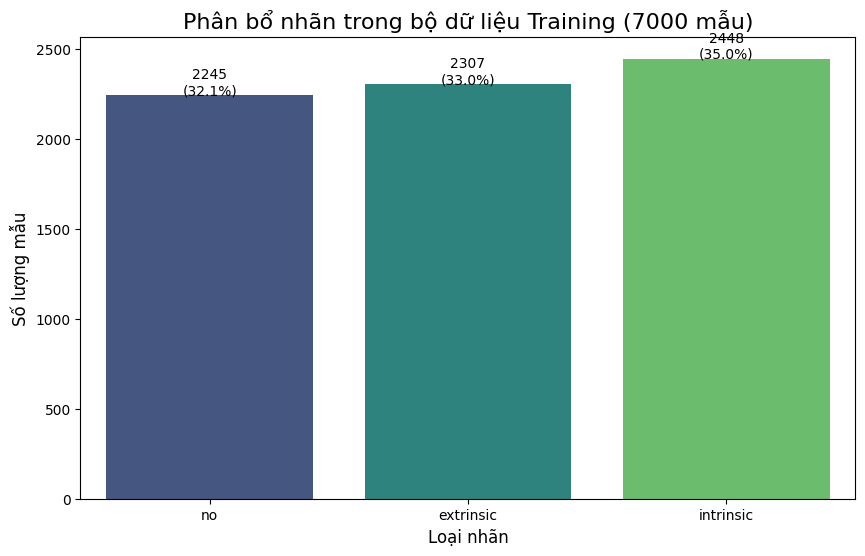


--- T√≠nh to√°n Tr·ªçng s·ªë L·ªõp (Class Weights) ---
Tr·ªçng s·ªë t√≠nh to√°n cho m·ªói l·ªõp (ƒë·ªÉ d√πng trong PyTorch):
label
no           1.039347
extrinsic    1.011415
intrinsic    0.953159
Name: count, dtype: float64

List tr·ªçng s·ªë ƒë·ªÉ ƒë∆∞a v√†o CrossEntropyLoss: [1.0393466963622866, 1.0114145354717525, 0.9531590413943355]


In [3]:
if df is not None:
    # 1. Ph√¢n t√≠ch ph√¢n b·ªï nh√£n
    print("--- Ph√¢n t√≠ch Ph√¢n b·ªï Nh√£n ---")
    label_counts = df['label'].value_counts()
    
    print("\nS·ªë l∆∞·ª£ng m·∫´u m·ªói l·ªõp:")
    print(label_counts)

    # 2. V·∫Ω bi·ªÉu ƒë·ªì
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis', order=['no', 'extrinsic', 'intrinsic'])
    plt.title('Ph√¢n b·ªï nh√£n trong b·ªô d·ªØ li·ªáu Training ({} m·∫´u)'.format(len(df)), fontsize=16)
    plt.xlabel('Lo·∫°i nh√£n', fontsize=12)
    plt.ylabel('S·ªë l∆∞·ª£ng m·∫´u', fontsize=12)
    
    # Th√™m s·ªë l∆∞·ª£ng tr√™n m·ªói c·ªôt
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}\n({p.get_height()/len(df):.1%})', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 9), 
                    textcoords = 'offset points')
    
    plt.show()

    # 3. T√≠nh to√°n tr·ªçng s·ªë l·ªõp (Class Weights)
    print("\n--- T√≠nh to√°n Tr·ªçng s·ªë L·ªõp (Class Weights) ---")
    # C√¥ng th·ª©c: weight_c = TotalSamples / (NumClasses * count_c)
    # ƒê√¢y l√† c√¥ng th·ª©c ph·ªï bi·∫øn t·ª´ scikit-learn
    num_classes = len(label_counts)
    total_samples = len(df)
    
    weights = total_samples / (num_classes * label_counts)
    
    # Chu·∫©n h√≥a l·∫°i ƒë·ªÉ tr·ªçng s·ªë c·ªßa l·ªõp nh·ªè nh·∫•t l√† ~1.0 (t√πy ch·ªçn, nh∆∞ng d·ªÖ nh√¨n)
    # normalized_weights = weights / weights.min()

    print("Tr·ªçng s·ªë t√≠nh to√°n cho m·ªói l·ªõp (ƒë·ªÉ d√πng trong PyTorch):")
    # S·∫Øp x·∫øp theo th·ª© t·ª± label_id 0, 1, 2 ('no', 'extrinsic', 'intrinsic')
    label_map = {'no': 0, 'extrinsic': 1, 'intrinsic': 2}
    sorted_labels = sorted(label_map, key=label_map.get)
    class_weights_ordered = weights.loc[sorted_labels]

    print(class_weights_ordered)
    
    # Chuy·ªÉn th√†nh list ƒë·ªÉ d·ªÖ d√†ng s·ª≠ d·ª•ng trong PyTorch
    class_weights_list = class_weights_ordered.tolist()
    print(f"\nList tr·ªçng s·ªë ƒë·ªÉ ƒë∆∞a v√†o CrossEntropyLoss: {class_weights_list}")



--- Ph√¢n t√≠ch ƒê·ªô d√†i VƒÉn b·∫£n (theo s·ªë t·ª´) ---



Th·ªëng k√™ m√¥ t·∫£ ƒë·ªô d√†i vƒÉn b·∫£n:


context_len   prompt_len  response_len  combined_len
count  7000.000000  7000.000000   7000.000000   7000.000000
mean    179.695714    26.760714     39.476857    245.933286
std      72.473282    13.385212     10.264012     76.497955
min      88.000000     3.000000      1.000000    118.000000
50%     161.000000    26.000000     40.000000    230.000000
90%     264.000000    44.000000     52.000000    336.000000
95%     311.000000    50.000000     55.000000    380.000000
99%     405.050000    63.000000     60.000000    486.010000
max    1537.000000    94.000000     68.000000   1630.000000

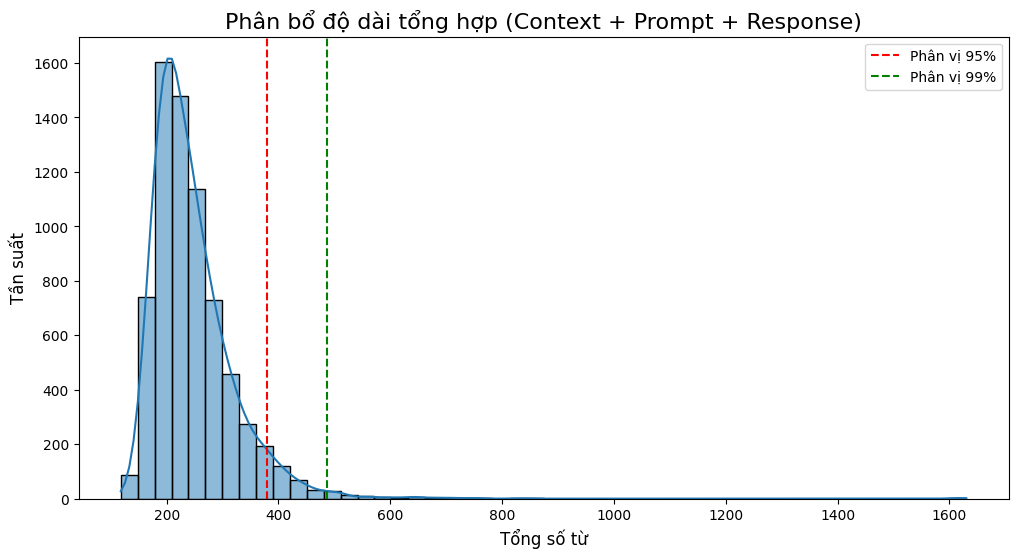

In [ ]:
if df is not None:
    print("\n--- Ph√¢n t√≠ch ƒê·ªô d√†i VƒÉn b·∫£n (theo s·ªë t·ª´) ---")
    # T√≠nh to√°n ƒë·ªô d√†i (b·ªè qua c√°c gi√° tr·ªã NaN n·∫øu c√≥)
    df['context_len'] = df['context'].dropna().str.split().str.len()
    df['prompt_len'] = df['prompt'].dropna().str.split().str.len()
    df['response_len'] = df['response'].dropna().str.split().str.len()
    df['combined_len'] = df['context_len'] + df['prompt_len'] + df['response_len']

    # In ra th·ªëng k√™ m√¥ t·∫£ chi ti·∫øt
    print("\nTh·ªëng k√™ m√¥ t·∫£ ƒë·ªô d√†i vƒÉn b·∫£n:")
    display(df[['context_len', 'prompt_len', 'response_len', 'combined_len']].describe(percentiles=[.90, .95, .99]))

    # V·∫Ω bi·ªÉu ƒë·ªì ph√¢n b·ªï c·ªßa ƒë·ªô d√†i t·ªïng h·ª£p
    plt.figure(figsize=(12, 6))
    sns.histplot(df['combined_len'], bins=50, kde=True)
    plt.title('Ph√¢n b·ªï ƒë·ªô d√†i t·ªïng h·ª£p (Context + Prompt + Response)', fontsize=16)
    plt.xlabel('T·ªïng s·ªë t·ª´', fontsize=12)
    plt.ylabel('T·∫ßn su·∫•t', fontsize=12)
    plt.axvline(df['combined_len'].quantile(0.95), color='red', linestyle='--', label='Ph√¢n v·ªã 95%')
    plt.axvline(df['combined_len'].quantile(0.99), color='green', linestyle='--', label='Ph√¢n v·ªã 99%')
    plt.legend()
    plt.show()


In [ ]:
if df is not None:
    pd.set_option('display.max_colwidth', None) # Hi·ªÉn th·ªã to√†n b·ªô n·ªôi dung c·ªôt

    print("\n--- V√≠ d·ª• cho nh√£n 'intrinsic' (M√¢u thu·∫´n) ---")
    display(df[df['label'] == 'intrinsic'].sample(2))

    print("\n--- V√≠ d·ª• cho nh√£n 'extrinsic' (B·ªãa ƒë·∫∑t) ---")
    display(df[df['label'] == 'extrinsic'].sample(2))
    
    print("\n--- V√≠ d·ª• v·ªÅ Prompt nhi·ªÖu (Noisy Prompt) ---")
    # T√¨m c√°c prompt c√≥ ch·ª©a k√Ω t·ª± ƒë·∫∑c bi·ªát ho·∫∑c c√≥ v·∫ª sai ch√≠nh t·∫£
    noisy_prompts = df[df['prompt'].str.contains('\?{2,}|[^\w\s\u00C0-\u1EF9,.]', regex=True, na=False)]
    display(noisy_prompts.sample(min(3, len(noisy_prompts))))



--- V√≠ d·ª• cho nh√£n 'intrinsic' (M√¢u thu·∫´n) ---


id  \
3448  342f60f7-5990-4327-b1c3-7a7208f227be   
4309  dcd55c94-acfc-4143-b6fa-2bd6bb57efcc   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        context  \
3448  Th√°ng 11 nƒÉm 1372, Tr·∫ßn Ngh·ªá T√¥ng xu·ªëng chi·∫øu nh∆∞·ªùng ng√¥i cho em l√† Tr·∫ßn K√≠nh, t·ª©c l√† Tr·∫ßn Du·ªá T√¥ng, c√≤n b·∫£n th√¢n l√™n l√†m Th√°i th∆∞·ª£ng ho√†ng. Tr·∫ßn Du·ªá T√¥ng l√† con c·ªßa ƒê√¥n T·ª´ th√°i phi, c≈©ng l√† c√¥ c·ªßa L√™ Qu√Ω Ly. Tr·∫ßn Du·ªá T√¥ng l·∫•y L√™ Qu√Ω Ly l√†m Tham m∆∞u qu√¢n s·ª±. NƒÉm 1376, vua Chi√™m l√† Ch·∫ø B·ªìng Nga l·∫°i mang qu√¢n x√¢m l·∫•n. Du·ªá T√¥ng sai ƒê·ªó T·ª≠ B√¨nh ƒëi ƒë√°nh. Ch·∫ø B·ªìng Nga s·ª£ h√£i, xin d√¢ng 10 m√¢m v√†ng t·∫° t·ªôi. T·ª≠ B√¨nh gi·∫•u v√†ng ƒëi, l·∫°i t√¢u v·ªÅ tri·ªÅu r·∫±ng vua Chi√™m ki√™u ng·∫°o kh√¥ng th·∫ßn ph·ª•c. Du·ªá T√¥ng quy·∫øt ƒë·ªãnh th√¢n chinh ƒëi ƒë√°nh. Th√°ng 12 nƒÉm 1376, Du·ªá T√¥ng c·∫ßm 12 v·∫°n qu√¢n ƒë√°nh Chi√™m Th√†nh. Th√°ng gi√™ng nƒÉm 1377, qu√¢n ƒê·∫°i Vi·ªát ti·∫øn v√†o c·ª≠a Thi N·∫°i (Quy Nh∆°n), ƒë√°nh l·∫•y ƒë·ªìn Th·∫°ch Ki·ªÅu r·ªìi ti·∫øn t·ªõi kinh th√†nh ƒê·ªì B√†n n∆∞·ªõc Chi√™m. Qu√¢n Vi·ªát b·ªã qu√¢n Chi√™m ph·ª•c k√≠ch, Du·ªá T√¥ng t·ª≠ tr·∫≠n. L√™ Qu√Ω Ly b·∫•y gi·ªù ƒëang ƒë·ªëc th√∫c qu√¢n t·∫£i l∆∞∆°ng, ƒë∆∞·ª£c tin Du·ªá T√¥ng t·ª≠ tr·∫≠n, s·ª£ h√£i, b·ªè ch·∫°y v·ªÅ tr∆∞·ªõc.   
4309                                                                                                                                                                                Nh∆∞ l√† Ch·ªß t·ªãch c·ªßa "·ª¶y ban T√™n l·ª≠a von Neumann" ƒë·∫ßu ti√™n, v√† nh∆∞ l√† m·ªôt th√†nh vi√™n c·ªßa Commission for Atomic Energy sau n√†y, b·∫Øt ƒë·∫ßu t·ª´ 1953 cho ƒë·∫øn c√°i ch·∫øt c·ªßa √¥ng v√†o 1957, √¥ng l√† khoa h·ªçc gia v·ªõi nhi·ªÅu uy th·∫ø ch√≠nh tr·ªã nh·∫•t ·ªü M·ªπ. Th√¥ng qua ·ªßy ban c·ªßa √¥ng, √¥ng ph√°t tri·ªÉn nhi·ªÅu t√¨nh hu·ªëng kh√°c nhau c·ªßa vi·ªác ch·∫°y ƒëua v≈© trang h·∫°t nh√¢n, s·ª± ph√°t tri·ªÉn c·ªßa c√°c t√™n l·ª≠a li√™n l·ª•c ƒë·ªãa v√† c√°c t√™n l·ª≠a ph√≥ng l√™n t·ª´ t√†u ng·∫ßm mang ƒë·∫ßu ƒë·∫°n h·∫°t nh√¢n, v√† th·∫ø c√¢n b·∫±ng chi·∫øn l∆∞·ª£c c√≤n nhi·ªÅu tranh c√£i g·ªçi l√† Ch·∫Øc ch·∫Øn H·ªßy di·ªát l·∫´n nhau (Mutually Assured Destruction). C√≥ th·ªÉ n√≥i √¥ng l√† b·ªô √≥c ƒë·∫±ng sau c√°c kh√≠a c·∫°nh "khoa h·ªçc" c·ªßa Chi·∫øn tranh L·∫°nh ƒë√£ t·∫°o ra ƒëi·ªÅu ki·ªán trong b·ªën m∆∞∆°i nƒÉm c·ªßa th·∫ø gi·ªõi ph∆∞∆°ng T√¢y.   

                                                                                               prompt  \
3448  Vua Tr·∫ßn Ngh·ªá T√¥ng tho√°i v·ªã v√†o th√°ng 11 nƒÉm 1372 ƒë·ªÉ nh∆∞·ªùng ng√¥i cho con trai m√¨nh, ph·∫£i kh√¥ng?   
4309                                 Ngu√≤i n√†o l√† nh√† khoa h·ªçc v√≥i nhi·ªÅu uy th·∫ø ch√≠n tr·ªã nh√°t ∆° M·ªπ z?   

                                                                                                                                                                                                                       response  \
3448  Tr·∫ßn Ngh·ªá T√¥ng tho√°i v·ªã th√°ng 11 nƒÉm 1372, nh∆∞·ªùng ng√¥i cho em trai l√† Tr·∫ßn Du·ªá T√¥ng, kh√¥ng ph·∫£i con trai. Trong tri·ªÅu ƒë·∫°i n√†y, Tr·∫ßn Du·ªá T√¥ng n·ªïi ti·∫øng v√¨ li√™n


--- V√≠ d·ª• cho nh√£n 'extrinsic' (B·ªãa ƒë·∫∑t) ---


id  \
3873  a731c83b-80d9-4809-a18d-a1e72640e326   
2240  95aad3be-5765-46ec-9602-36a1cd8ac9c5   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          context  \
3873                                                                                                                                                                                                                                      To√†n t·ªânh hi·ªán c√≥ 2.086 km ƒë∆∞·ªùng giao th√¥ng. Trong ƒë√≥, ƒë∆∞·ªùng do trung ∆∞∆°ng qu·∫£n l√Ω d√†i 224,38 km, chi·∫øm 10,75%; ƒë∆∞·ªùng do t·ªânh qu·∫£n l√Ω d√†i 254,95 km, chi·∫øm 12,21%; ƒë∆∞·ªùng do huy·ªán qu·∫£n l√Ω d√†i 327,47 km, chi·∫øm 15,69% v√† ƒë∆∞·ªùng do x√£ qu·∫£n l√Ω d√†i 1.566,97 km, chi·∫øm 75%. Ch·∫•t l∆∞·ª£ng ƒë∆∞·ªùng b·ªô: √ê∆∞·ªùng c·∫•p ph·ªëi, ƒë∆∞·ªùng ƒë√° dƒÉm d√†i 399,52 km chi·∫øm 19,14%; ƒë∆∞·ªùng nh·ª±a d√†i 362,77 km, chi·∫øm 17,38% c√≤n l·∫°i l√† ƒë∆∞·ªùng ƒë·∫•t. T·∫•t c·∫£ c√°c x√£ ƒë√£ c√≥ ƒë∆∞·ªùng √¥ t√¥ ƒë·∫øn t·∫≠n trung t√¢m x√£. Hi·ªán nay, Nha Trang ƒëang c√≥ 6 tuy·∫øn xe bu√Ωt ph·ª•c v·ª• c√¥ng c·ªông.   
2240  Th·∫ßn h·ªçc Ki-t√¥ gi√°o l√† vi·ªác nghi√™n c·ª©u ni·ªÅm tin v√† th·ª±c h√†nh ƒë·ª©c tin Ki-t√¥ gi√°o. Vi·ªác nghi√™n c·ª©u nh∆∞ v·∫≠y tr∆∞·ªõc h·∫øt t·∫≠p trung v√†o c√°c b·∫£n vƒÉn C·ª±u ∆Ø·ªõc v√† T√¢n ∆Ø·ªõc c√∫ng nh∆∞ truy·ªÅn th·ªëng Ki-t√¥ gi√°o. C√°c nh√† th·∫ßn h·ªçc Ki-t√¥ gi√°o s·ª≠ d·ª•ng c√°c l·ªùi gi·∫£i th√≠ch Kinh Th√°nh, c√°c ph√¢n t√≠ch v√† tranh lu·∫≠n h·ª£p l√Ω. Th·∫ßn h·ªçc c≈©ng c√≥ th·ªÉ ƒë∆∞·ª£c th·ª±c hi·ªán ƒë·ªÉ gi√∫p c√°c nh√† th·∫ßn h·ªçc hi·ªÉu r√µ h∆°n c√°c gi√°o l√Ω Ki-t√¥ gi√°o, ƒë·ªÉ t·∫°o n√™n s·ª± so s√°nh gi·ªØa Ki-t√¥ gi√°o v·ªõi c√°c truy·ªÅn th·ªëng kh√°c, ƒë·ªÉ b·∫£o v·ªá Ki-t√¥ gi√°o tr∆∞·ªõc nh·ªØng l·ªùi ph·∫£n ƒë·ªëi v√† ph√™ b√¨nh, ƒë·ªÉ l√†m d·ªÖ d√†ng h∆°n cho c√°c s·ª≠a ƒë·ªïi b√™n trong Ki-t√¥ gi√°o, ƒë·ªÉ h·ªó tr·ª£ cho vi·ªác rao gi·∫£ng Ki-t√¥ gi√°o, ƒë·ªÉ ƒë∆∞a nh·ªØng c√°ch th·ª©c c·ªßa truy·ªÅn th·ªëng Ki-t√¥ gi√°o nh·∫±m chuy·ªÉn t·∫£i nh·ªØng t√¨nh hu·ªëng hi·ªán th·ªùi hay c·∫ßn thi·∫øt, ho·∫∑c nhi·ªÅu l√Ω do kh√°c.   

                                                                                                                                              prompt  \
3873  ƒê·ªô d√†i ƒë∆∞·ªùng giao th√¥ng t·∫°i Kh√°nh H√≤a do t·ªânh qu·∫£n l√Ω c√≥ ƒë·ªô d√†i bao nhi√™u, n·∫øu bi·∫øt r·∫±ng t·ªïng chi·ªÅu d√†i ƒë∆∞·ªùng giao th√¥ng c·ªßa t·ªânh l√† 3.000 km?   
2240                                                                                             Linh vuc nghien cuu cua thaan hoc Kito giaso la gi?   

                                                                                                                                                                                                  response  \
3873                ƒê∆∞·ªùng giao th√¥ng t·∫°i Kh√°nh H√≤a do t·ªânh qu·∫£n l√Ω c√≥ ƒë·ªô d√†i 254,95 km. Ngo√†i ra, t·ªânh Kh√°nh H√≤a c√≤n n·ªïi ti·∫øng v·ªõi b√£i bi·ªÉn Nha Trang, m·ªôt trong nh·ªØng ƒëi·ªÉm du l·ªãch h·∫•p d·∫´n nh·∫•t Vi·ªát Nam.   
2240  Th·∫ßn h·ªçc Ki-t√¥ gi√°o ch·ªß y·∫øu nghi√™n c·ª©u c√°c t√°c ph·∫©m tri·∫øt h·ªçc Hy L·∫°p c·ªï ƒë·∫°i ƒë·ªÉ hi·ªÉu r√µ h∆°n v·ªÅ c√°c gi√°o l√Ω v√† th·ª±c h√†nh c·ªßa ƒë·∫°o Ph·∫≠t, t·∫≠p trung v√†o vi·ªác so s√°nh v·ªõi c√°c truy·ªÅn th·ªëng phi Ki-t√¥ gi√°o.   

   


--- V√≠ d·ª• v·ªÅ Prompt nhi·ªÖu (Noisy Prompt) ---


id  \
3966  53110cbd-1bc1-4ae3-8161-aeb77492239d   
3873  a731c83b-80d9-4809-a18d-a1e72640e326   
6385  4bb6108c-ff78-4d79-8d9b-df350a274766   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     context  \
3966  NƒÉm 1952, nh∆∞ m·ªôt ph·∫ßn c·ªßa c√°c cu·ªôc c·∫£i c√°ch ƒë·ªÉ t·∫≠p trung quy·ªÅn l·ª±c trong tay B·ªô ch√≠nh tr·ªã c·ªßa SED, nƒÉm L√§nder c·ªßa ƒê√¥ng ƒê·ª©c b·ªã xo√° b·ªè, v√† ƒê√¥ng ƒê·ª©c ƒë∆∞·ª£c chia th√†nh m∆∞·ªùi lƒÉm Bezirke (t·ªânh), m·ªói qu·∫≠n ƒë∆∞·ª£c ƒë·∫∑t theo t√™n th√†nh ph·ªë l·ªõn nh·∫•t c·ªßa n√≥: v√πng ƒê·∫•t ph√≠a b·∫Øc Mecklenburg-Vorpommern ƒë∆∞·ª£c chia gi·ªØa Bezirke Rostock, Schwerin v√† Neubrandenburg; Brandenburg (bao quanh Berlin) ƒë∆∞·ª£c t√°i t·ªï ch·ª©c th√†nh Bezirke Potsdam, Frankfurt v√† Cottbus; Saxony-Anhalt ƒë∆∞·ª£c chia th√†nh Bezirke Halle v√† Magdeburg; v√πng ƒê·∫•t t√¢y nam Thuringia th√†nh Bezirke Erfurt, Gera v√† Suhl; cu·ªëi c√πng, v√πng ƒê·∫•t ƒë√¥ng nam Sachsen ƒë∆∞·ª£c chia gi·ªØa Leipzig, Dresden v√† Karl-Marx-Stadt (tr∆∞·ªõc kia v√† sau khi C·ªông ho√† D√¢n ch·ªß ƒê·ª©c s·ª•p ƒë·ªï l·∫°i ƒë∆∞·ª£c g·ªçi l√† Chemnitz). Th·ªß ƒë√¥ C·ªông ho√† D√¢n ch·ªß ƒê·ª©c, ƒê√¥ng Berlin tr·ªü th√†nh Bezirk th·ª© 15, d√π n√≥ v·∫´n gi·ªØ v·ªã th·∫ø lu·∫≠t ph√°p ƒë·∫∑c bi·ªát trong C·ªông ho√† D√¢n ch·ªß ƒê·ª©c cho t·ªõi nƒÉm 1968, khi nh·ªØng ng∆∞·ªùi d√¢n ƒê√¥ng Berlin c√πng to√†n b·ªô ng∆∞·ªùi d√¢n C·ªông ho√† D√¢n ch·ªß ƒê·ª©c th√¥ng qua d·ª± th·∫£o hi·∫øn ph√°p m·ªõi. T·ª´ th·ªùi ƒëi·ªÉm n√†y tr·ªü v·ªÅ sau, b·∫•t ch·∫•p V·ªã th·∫ø B·ªën C∆∞·ªùng qu·ªëc v√† nh·ªØng s·ª± ph·∫£n ƒë·ªëi c·ªßa ƒë·ªìng minh ph∆∞∆°ng T√¢y r·∫±ng ƒê√¥ng Berlin ch·ªâ ƒë∆°n gi·∫£n l√† khu v·ª±c chi·∫øm ƒë√≥ng c·ªßa X√¥ vi·∫øt t·∫°i th·ªß ƒë√¥ ƒê·ª©c, ƒê√¥ng Berlin ƒë∆∞·ª£c coi nh∆∞ m·ªôt Bezirk nh∆∞ c√°c t·ªânh kh√°c.   
3873                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 To√†n t·ªânh hi·ªán c√≥ 2.086 km ƒë∆∞·ªùng giao th√¥ng. Trong ƒë√≥, ƒë∆∞·ªùng do trung ∆∞∆°ng qu·∫£n l√Ω d√†i 224,38 km, chi·∫øm 10,75%; ƒë∆∞·ªùng do t·ªânh qu·∫£n l√Ω d√†i 254,95 km, chi·∫øm 12,21%; ƒë∆∞·ªùng do huy·ªán qu·∫£n l√Ω d√†i 327,47 km, chi·∫øm 15,69% v√† ƒë∆∞·ªùng do x√£ qu·∫£n l√Ω d√†i 1.566,97 km, chi·∫øm 75%. Ch·∫•t l∆∞·ª£ng ƒ


--- Ph√¢n t√≠ch ƒê·ªô t∆∞∆°ng ƒë·ªìng vƒÉn b·∫£n (Token Set Ratio) ---


  0%|          | 0/7000 [00:00<?, ?it/s]

/tmp/ipykernel_184049/1896374737.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y='similarity_score', data=df, order=['no', 'intrinsic', 'extrinsic'], palette='coolwarm')


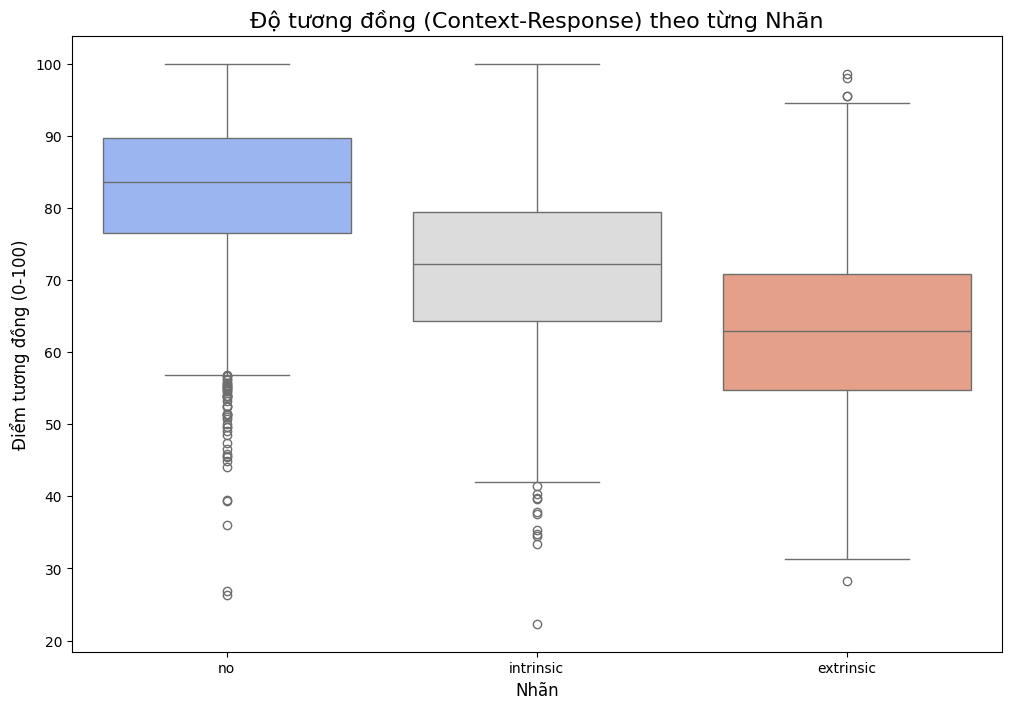


üëâ Insight:
- L·ªõp 'no' c√≥ ƒë·ªô t∆∞∆°ng ƒë·ªìng cao v√† ·ªïn ƒë·ªãnh nh·∫•t, v√¨ c√¢u tr·∫£ l·ªùi b√°m s√°t context.
- L·ªõp 'intrinsic' c√≥ ƒë·ªô t∆∞∆°ng ƒë·ªìng kh√° cao nh∆∞ng ph√¢n t√°n, v√¨ n√≥ v·∫´n d√πng t·ª´ trong context nh∆∞ng 'b√≥p m√©o' ch√∫ng.
- L·ªõp 'extrinsic' c√≥ ƒë·ªô t∆∞∆°ng ƒë·ªìng th·∫•p nh·∫•t, v√¨ n√≥ 'b·ªãa' th√™m th√¥ng tin m·ªõi.
=> ƒê·ªô t∆∞∆°ng ƒë·ªìng l√† m·ªôt feature r·∫•t m·∫°nh ƒë·ªÉ ph√¢n bi·ªát c√°c l·ªõp!


In [ ]:
if df is not None:
    print("\n--- Ph√¢n t√≠ch ƒê·ªô t∆∞∆°ng ƒë·ªìng vƒÉn b·∫£n (Token Set Ratio) ---")

    # T√≠nh to√°n ƒë·ªô t∆∞∆°ng ƒë·ªìng gi·ªØa context v√† response
    # token_set_ratio r·∫•t hi·ªáu qu·∫£ v√¨ n√≥ b·ªè qua th·ª© t·ª± t·ª´ v√† t·ª´ l·∫∑p l·∫°i
    df['similarity_score'] = df.progress_apply(
        lambda row: token_set_ratio(str(row['context']), str(row['response'])),
        axis=1
    )

    # V·∫Ω bi·ªÉu ƒë·ªì boxplot
    plt.figure(figsize=(12, 8))
    sns.boxplot(x='label', y='similarity_score', data=df, order=['no', 'intrinsic', 'extrinsic'], palette='coolwarm')
    plt.title('ƒê·ªô t∆∞∆°ng ƒë·ªìng (Context-Response) theo t·ª´ng Nh√£n', fontsize=16)
    plt.xlabel('Nh√£n', fontsize=12)
    plt.ylabel('ƒêi·ªÉm t∆∞∆°ng ƒë·ªìng (0-100)', fontsize=12)
    plt.show()

    print("\nüëâ Insight:")
    print("- L·ªõp 'no' c√≥ ƒë·ªô t∆∞∆°ng ƒë·ªìng cao v√† ·ªïn ƒë·ªãnh nh·∫•t, v√¨ c√¢u tr·∫£ l·ªùi b√°m s√°t context.")
    print("- L·ªõp 'intrinsic' c√≥ ƒë·ªô t∆∞∆°ng ƒë·ªìng kh√° cao nh∆∞ng ph√¢n t√°n, v√¨ n√≥ v·∫´n d√πng t·ª´ trong context nh∆∞ng 'b√≥p m√©o' ch√∫ng.")
    print("- L·ªõp 'extrinsic' c√≥ ƒë·ªô t∆∞∆°ng ƒë·ªìng th·∫•p nh·∫•t, v√¨ n√≥ 'b·ªãa' th√™m th√¥ng tin m·ªõi.")
    print("=> ƒê·ªô t∆∞∆°ng ƒë·ªìng l√† m·ªôt feature r·∫•t m·∫°nh ƒë·ªÉ ph√¢n bi·ªát c√°c l·ªõp!")



--- Ph√¢n t√≠ch s·ª± xu·∫•t hi·ªán c·ªßa 'S·ªë M·ªõi' trong Response ---


  0%|          | 0/7000 [00:00<?, ?it/s]

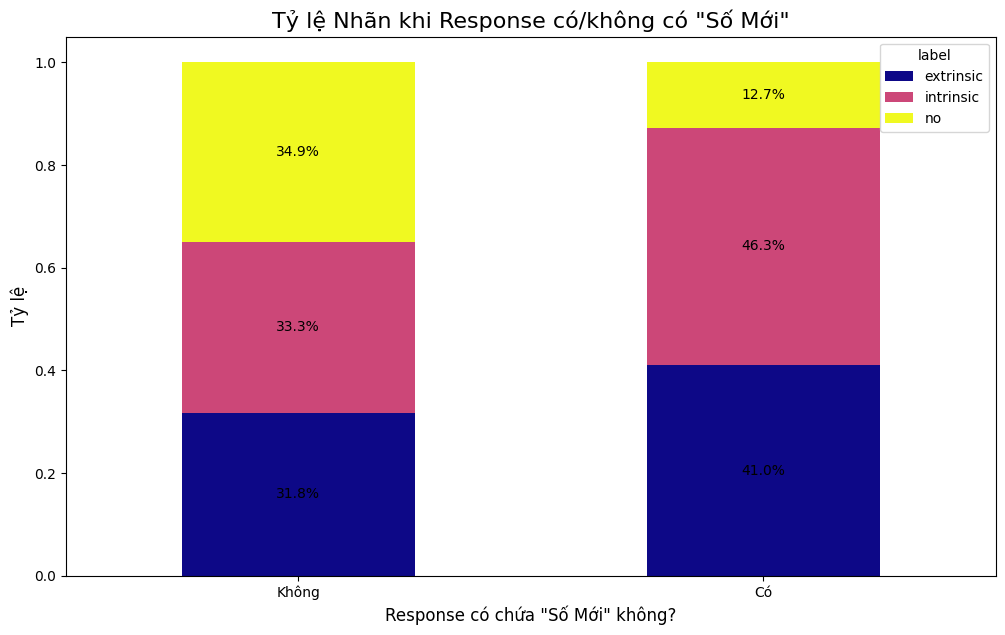


üëâ Insight:
Khi response KH√îNG ch·ª©a s·ªë m·ªõi, ph·∫ßn l·ªõn l√† nh√£n 'no'.
Khi response C√ì ch·ª©a s·ªë m·ªõi, t·ª∑ l·ªá ·∫£o gi√°c (ƒë·∫∑c bi·ªát l√† 'intrinsic' v√† 'extrinsic') tƒÉng v·ªçt.
=> Feature 'has_new_number' l√† m·ªôt t√≠n hi·ªáu c·ª±c k·ª≥ m·∫°nh ƒë·ªÉ ph√°t hi·ªán hallucination.


In [ ]:
import re

def count_new_numbers(row):
    """ƒê·∫øm s·ªë l∆∞·ª£ng c√°c con s·ªë ch·ªâ xu·∫•t hi·ªán trong response."""
    # Regex ƒë·ªÉ t√¨m t·∫•t c·∫£ c√°c chu·ªói s·ªë (bao g·ªìm c·∫£ d·∫•u ph·∫©y, ch·∫•m)
    context_numbers = set(re.findall(r'\b\d[\d,.]*\b', str(row['context'])))
    response_numbers = set(re.findall(r'\b\d[\d,.]*\b', str(row['response'])))
    
    # Tr·∫£ v·ªÅ s·ªë l∆∞·ª£ng s·ªë trong response m√† kh√¥ng c√≥ trong context
    return len(response_numbers - context_numbers)

if df is not None:
    print("\n--- Ph√¢n t√≠ch s·ª± xu·∫•t hi·ªán c·ªßa 'S·ªë M·ªõi' trong Response ---")
    df['new_numbers_count'] = df.progress_apply(count_new_numbers, axis=1)

    # T·∫°o m·ªôt c·ªôt boolean ƒë·ªÉ ph√¢n t√≠ch d·ªÖ h∆°n
    df['has_new_number'] = df['new_numbers_count'] > 0

    # V·∫Ω bi·ªÉu ƒë·ªì crosstab
    crosstab = pd.crosstab(df['has_new_number'], df['label'], normalize='index')
    
    ax = crosstab.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='plasma', rot=0)
    plt.title('T·ª∑ l·ªá Nh√£n khi Response c√≥/kh√¥ng c√≥ "S·ªë M·ªõi"', fontsize=16)
    plt.xlabel('Response c√≥ ch·ª©a "S·ªë M·ªõi" kh√¥ng?', fontsize=12)
    plt.ylabel('T·ª∑ l·ªá', fontsize=12)
    plt.xticks([0, 1], ['Kh√¥ng', 'C√≥'])

    # Th√™m ch√∫ th√≠ch ph·∫ßn trƒÉm
    for c in ax.containers:
        ax.bar_label(c, fmt='{:.1%}', label_type='center')
        
    plt.show()

    print("\nüëâ Insight:")
    print("Khi response KH√îNG ch·ª©a s·ªë m·ªõi, ph·∫ßn l·ªõn l√† nh√£n 'no'.")
    print("Khi response C√ì ch·ª©a s·ªë m·ªõi, t·ª∑ l·ªá ·∫£o gi√°c (ƒë·∫∑c bi·ªát l√† 'intrinsic' v√† 'extrinsic') tƒÉng v·ªçt.")
    print("=> Feature 'has_new_number' l√† m·ªôt t√≠n hi·ªáu c·ª±c k·ª≥ m·∫°nh ƒë·ªÉ ph√°t hi·ªán hallucination.")



--- Ph√¢n t√≠ch ·∫£nh h∆∞·ªüng c·ªßa 'Prompt G√†i b·∫´y' ---


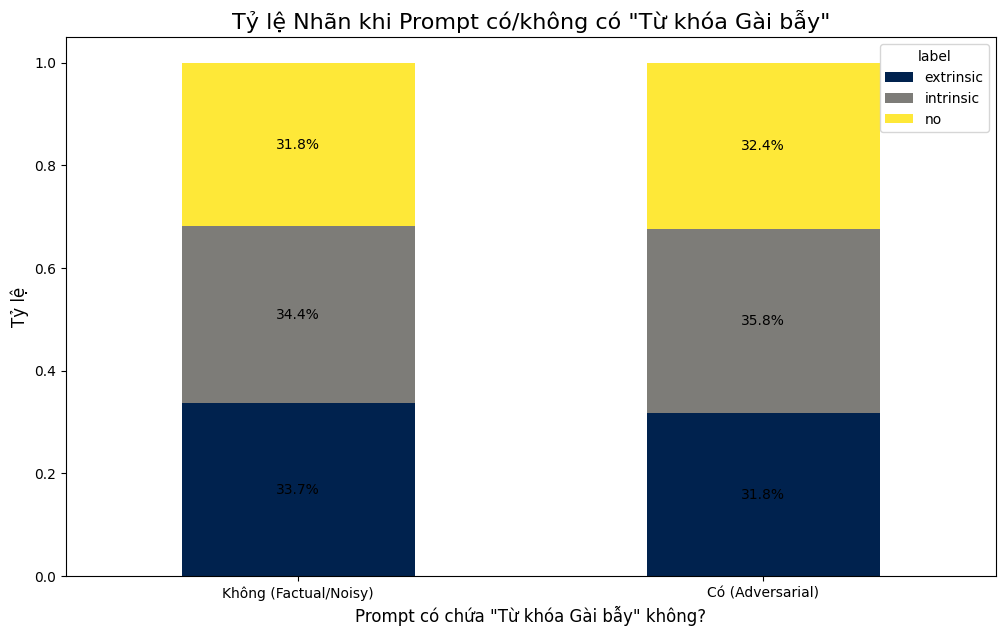


üëâ Insight:
C√°c prompt 'g√†i b·∫´y' c√≥ xu h∆∞·ªõng l√†m tƒÉng nh·∫π t·ª∑ l·ªá ·∫£o gi√°c, ƒë·∫∑c bi·ªát l√† 'intrinsic'.
ƒêi·ªÅu n√†y cho th·∫•y m√¥ h√¨nh c·∫ßn h·ªçc c√°ch tin t∆∞·ªüng 'context' h∆°n l√† c√°c ti·ªÅn ƒë·ªÅ sai trong 'prompt'.


In [ ]:
ADVERSARIAL_KEYWORDS = [
    "m·∫∑c d√π", "th·ª±c s·ª±", "ƒë√∫ng kh√¥ng", "ph·∫£i kh√¥ng", "ƒë√∫ng hay sai", 
    "c√≥ ph·∫£i", "v·ªën kh√¥ng", "ngo√†i... ra", "thay v√¨"
]

def has_adversarial_keyword(prompt):
    prompt_lower = str(prompt).lower()
    return any(keyword in prompt_lower for keyword in ADVERSARIAL_KEYWORDS)

if df is not None:
    print("\n--- Ph√¢n t√≠ch ·∫£nh h∆∞·ªüng c·ªßa 'Prompt G√†i b·∫´y' ---")
    df['is_adversarial_prompt'] = df['prompt'].apply(has_adversarial_keyword)

    crosstab_prompt = pd.crosstab(df['is_adversarial_prompt'], df['label'], normalize='index')
    
    ax = crosstab_prompt.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='cividis', rot=0)
    plt.title('T·ª∑ l·ªá Nh√£n khi Prompt c√≥/kh√¥ng c√≥ "T·ª´ kh√≥a G√†i b·∫´y"', fontsize=16)
    plt.xlabel('Prompt c√≥ ch·ª©a "T·ª´ kh√≥a G√†i b·∫´y" kh√¥ng?', fontsize=12)
    plt.ylabel('T·ª∑ l·ªá', fontsize=12)
    plt.xticks([0, 1], ['Kh√¥ng (Factual/Noisy)', 'C√≥ (Adversarial)'])
    
    for c in ax.containers:
        ax.bar_label(c, fmt='{:.1%}', label_type='center')
        
    plt.show()
    
    print("\nüëâ Insight:")
    print("C√°c prompt 'g√†i b·∫´y' c√≥ xu h∆∞·ªõng l√†m tƒÉng nh·∫π t·ª∑ l·ªá ·∫£o gi√°c, ƒë·∫∑c bi·ªát l√† 'intrinsic'.")
    print("ƒêi·ªÅu n√†y cho th·∫•y m√¥ h√¨nh c·∫ßn h·ªçc c√°ch tin t∆∞·ªüng 'context' h∆°n l√† c√°c ti·ªÅn ƒë·ªÅ sai trong 'prompt'.")


In [ ]:
def get_top_ngrams(corpus, n=2, top_k=15):
    """Tr√≠ch xu·∫•t c√°c n-gram ph·ªï bi·∫øn nh·∫•t t·ª´ m·ªôt kho vƒÉn b·∫£n."""
    vec = CountVectorizer(ngram_range=(n, n), stop_words=None).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:top_k]

if df is not None:
    print("\n--- Ph√¢n t√≠ch N-gram ph·ªï bi·∫øn trong Response b·ªã l·ªói ---")
    
    # L·ªçc ra c√°c response c·ªßa t·ª´ng lo·∫°i l·ªói
    intrinsic_responses = df[df['label'] == 'intrinsic']['response'].dropna()
    extrinsic_responses = df[df['label'] == 'extrinsic']['response'].dropna()

    # L·∫•y top bi-grams (c·ª•m 2 t·ª´)
    top_intrinsic_bigrams = get_top_ngrams(intrinsic_responses, n=2)
    top_extrinsic_bigrams = get_top_ngrams(extrinsic_responses, n=2)

    # T·∫°o DataFrame ƒë·ªÉ hi·ªÉn th·ªã
    df_bigrams = pd.DataFrame({
        'Top Intrinsic Bi-grams': [f"{gram} ({count})" for gram, count in top_intrinsic_bigrams],
        'Top Extrinsic Bi-grams': [f"{gram} ({count})" for gram, count in top_extrinsic_bigrams]
    })
    
    print("\nTop 15 Bi-grams (c·ª•m 2 t·ª´) ph·ªï bi·∫øn nh·∫•t:")
    display(df_bigrams)

    print("\nüëâ Insight:")
    print("Ph√¢n t√≠ch n-gram c√≥ th·ªÉ h√© l·ªô c√°c 'c·ª•m t·ª´ ·∫£o gi√°c' ph·ªï bi·∫øn m√† m√¥ h√¨nh sinh ra.")
    print("V√≠ d·ª•: 'Ngo√†i ra', 'Th·ª±c t·∫ø', 'Tuy nhi√™n' c√≥ th·ªÉ l√† d·∫•u hi·ªáu b·∫Øt ƒë·∫ßu c·ªßa m·ªôt c√¢u 'b·ªãa' th√™m (extrinsic).")



--- Ph√¢n t√≠ch N-gram ph·ªï bi·∫øn trong Response b·ªã l·ªói ---

Top 15 Bi-grams (c·ª•m 2 t·ª´) ph·ªï bi·∫øn nh·∫•t:


Top Intrinsic Bi-grams Top Extrinsic Bi-grams
0         ho√†n to√†n (313)        n·ªïi ti·∫øng (371)
1           v√†o nƒÉm (276)       ph√°t tri·ªÉn (299)
2            m·∫∑c d√π (255)          v√†o nƒÉm (261)
3          kh√¥ng c√≥ (255)        ti·∫øng v·ªõi (237)
4          ƒëi·ªÅu n√†y (253)        kh√¥ng ch·ªâ (224)
5        ph√°t tri·ªÉn (241)         ƒëi·ªÅu n√†y (222)
6          v√† kh√¥ng (190)           m√† c√≤n (213)
7        kh√¥ng ph·∫£i (177)        ·∫£nh h∆∞·ªüng (201)
8          qu·ªëc gia (176)          t·ªï ch·ª©c (198)
9            b·∫•t k·ª≥ (171)           m·∫∑c d√π (198)
10          th·ª±c t·∫ø (154)          s·ª≠ d·ª•ng (194)
11        n·ªïi ti·∫øng (153)         ngo√†i ra (188)
12          kinh t·∫ø (152)       quan tr·ªçng (181)
13          khu v·ª±c (151)       kh√¥ng ph·∫£i (179)
14       trung qu·ªëc (147)           c√≥ th·ªÉ (176)


üëâ Insight:
Ph√¢n t√≠ch n-gram c√≥ th·ªÉ h√© l·ªô c√°c 'c·ª•m t·ª´ ·∫£o gi√°c' ph·ªï bi·∫øn m√† m√¥ h√¨nh sinh ra.
V√≠ d·ª•: 'Ngo√†i ra', 'Th·ª±c t·∫ø', 'Tuy nhi√™n' c√≥ th·ªÉ l√† d·∫•u hi·ªáu b·∫Øt ƒë·∫ßu c·ªßa m·ªôt c√¢u 'b·ªãa' th√™m (extrinsic).



--- Ph√¢n t√≠ch S√¢u L·ªõp 'extrinsic' ---


Analyzing extrinsic sentences:   0%|          | 0/2307 [00:00<?, ?it/s]

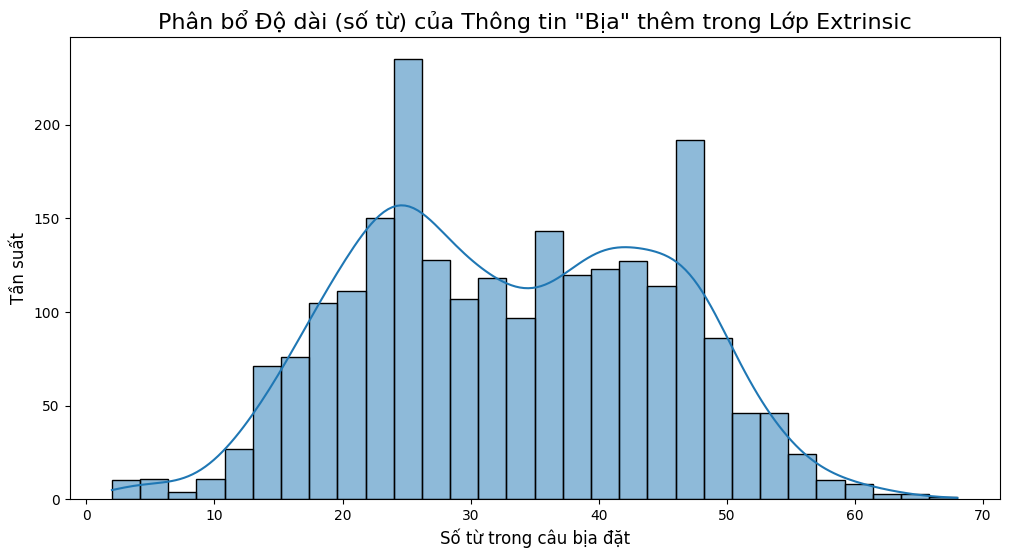


V√≠ d·ª• c√°c c√¢u 'b·ªãa ƒë·∫∑t' ng·∫Øn nh·∫•t ƒë∆∞·ª£c t√¨m th·∫•y:


context  \
5626  Ng√†y 2 th√°ng 4 nƒÉm 1921, Ch√≠nh ph·ªß Trung Hoa D√¢n Qu·ªëc (Qu·∫£ng Ch√¢u) ƒë∆∞·ª£c th√†nh l·∫≠p, T√¥n Trung S∆°n nh·∫≠m ch·ª©c "ƒë·∫°i t·ªïng th·ªëng phi th∆∞·ªùng", l·∫ßn ƒë·∫ßu ti√™n s·ª≠ d·ª•ng "Thanh Thi√™n B·∫°ch Nh·∫≠t M√£n ƒê·ªãa H·ªìng k·ª≥" l√†m qu·ªëc k·ª≥, nh·∫±m ph·∫£n ƒë·ªëi t√≠nh h·ª£p ph√°p c·ªßa Ch√≠nh ph·ªß B·∫Øc D∆∞∆°ng, ƒë·∫øn nƒÉm sau do V·∫≠n ƒë·ªông H·ªô ph√°p l·∫ßn th·ª© hai th·∫•t b·∫°i n√™n gi·∫£i th·ªÉ. Ng√†y 2 th√°ng 3 nƒÉm 1923, T√¥n Trung S∆°n v·ªÅ Qu·∫£ng Ch√¢u l·∫≠p ƒê·∫°i b·∫£n doanh ƒê·∫°i nguy√™n so√°i L·ª•c-H·∫£i qu√¢n, t√°i l·∫≠p ch√≠nh ph·ªß qu√¢n s·ª±; ƒë·∫øn ng√†y 1 th√°ng 7 nƒÉm 1925, c·∫£i t·ªï th√†nh Ch√≠nh ph·ªß Qu·ªëc d√¢n Trung Hoa D√¢n Qu·ªëc, sau khi B·∫Øc ph·∫°t th√†nh c√¥ng thay th·∫ø Ch√≠nh ph·ªß B·∫Øc D∆∞∆°ng l√†m ch√≠nh ph·ªß trung ∆∞∆°ng v√† c∆° quan h√†nh ch√≠nh t·ªëi cao c·ªßa Trung Hoa D√¢n Qu·ªëc. Ng√†y 20 th√°ng 5 nƒÉm 1948, Ch√≠nh ph·ªß Qu·ªëc d√¢n c·∫£i t·ªï th√†nh Ch√≠nh ph·ªß Trung Hoa D√¢n Qu·ªëc, ch·ª©c v·ª• Ch·ªß t·ªãch Ch√≠nh ph·ªß Qu·ªëc d√¢n ƒë·ªïi th√†nh "T·ªïng th·ªëng", duy tr√¨ ƒë·∫øn nay.   
355   Ng√†y 16 th√°ng 6 nƒÉm 1953, sau m·ªôt quota s·∫£n xu·∫•t tƒÉng 10% c√¥ng nh√¢n x√¢y d·ª±ng ƒë·∫°i l·ªô m·ªõi ·ªü ƒê√¥ng Berlin, Stalinallee (ng√†y nay ƒë∆∞·ª£c g·ªçi l√† Karl-Marx-Allee), nh·ªØng cu·ªôc tu·∫ßn h√†nh c·ªßa c√°c c√¥ng nh√¢n b·∫•t b√¨nh n·ªï ra ·ªü ƒê√¥ng Berlin. Ng√†y h√¥m sau nh·ªØng cu·ªôc bi·ªÉu t√¨nh ph·∫£n kh√°ng lan kh·∫Øp ƒê√¥ng ƒê·ª©c v·ªõi h∆°n m·ªôt tri·ªáu ng∆∞·ªùi ƒë√¨nh c√¥ng v√† bi·ªÉu t√¨nh trong 700 c·ªông ƒë·ªìng. Lo s·ª£ m·ªôt cu·ªôc b·∫°o ƒë·ªông, ch√≠nh ph·ªß y√™u c·∫ßu qu√¢n ƒë·ªôi chi·∫øm ƒë√≥ng X√¥ vi·∫øt tr·ª£ gi√∫p v√† v√†o bu·ªïi s√°ng ng√†y 18 xe tƒÉng c√πng binh sƒ© ƒë∆∞·ª£c tri·ªÉn khai tr·∫•n √°p nh·ªØng ng∆∞·ªùi bi·ªÉu t√¨nh. Nh∆∞ng b·∫°o ƒë·ªông v·∫´n n·ªï ra, l√†m kho·∫£ng nƒÉm m∆∞∆°i ng∆∞·ªùi ch·∫øt v√† m·ªôt l√†n s√≥ng b·∫Øt gi·ªØ, b·ªè t√π l√™n t·ªõi h∆°n 10.000 ng∆∞·ªùi. S·ª± qu√° c·∫£nh gi·ªØa T√¢y v√† ƒê√¥ng Berlin l√† kh√° t·ª± do ·ªü th·ªùi ƒëi·ªÉm ·∫•y, c√≥ nghƒ©a r·∫±ng nh·ªØng ng∆∞·ªùi bi·ªÉu t√¨nh v√† nh·ªØng h√†nh ƒë·ªông tr·∫•n √°p bi·ªÉu t√¨nh c·ªßa Li√™n X√¥ ƒë√£ ƒë∆∞·ª£c nhi·ªÅu nh√† quan s√°t ph∆∞∆°ng T√¢y ghi nh·∫≠n.   
5153                                                                                                                                                                                                                                 Trong th√°ng 6 nƒÉm 1940, sau khi Ph√°p th·∫•t th·ªß tr∆∞·ªõc qu√¢n ƒê·ª©c, H·ªôi ƒë·ªìng to√†n th·ªÉ Nouvelle-Cal√©donie nh·∫•t tr√≠ ·ªßng h·ªô ch√≠nh ph·ªß Ph√°p qu·ªëc T·ª± do, v√† ƒë·∫øn th√°ng 9 v·ªã th·ªëng ƒë·ªëc th√¢n Vichy b·ªã bu·ªôc ph·∫£i r·ªùi ƒë·∫øn ƒê√¥ng D∆∞∆°ng. Trong th√°ng 3 nƒÉm 1942, ƒë∆∞·ª£c √öc gi√∫p ƒë·ª°, l√£nh th·ªï tr·ªü th√†nh m·ªôt cƒÉn c·ª© quan tr·ªçng c·ªßa ƒê·ªìng Minh, v√† Noum√©a l√† ƒë·∫°i b·∫£n quan c·ªßa l·ª±c l∆∞·ª£ng h·∫£i qu√¢n v√† l·ª•c qu√¢n c·ªßa Hoa K·ª≥ t·∫°i Nam Th√°i B√¨nh D∆∞∆°ng. H·∫°m ƒë·ªôi t·ª´ng ƒë·∫©y lui l·ª±c l∆∞·ª£ng h·∫£i qu√¢n c·ªßa Nh·∫≠t B·∫£n trong tr·∫≠n chi·∫øn bi·ªÉn Coral v√†o th√°ng 5 nƒÉm 1942 c√≥ cƒÉn c·ª© t·∫°i Noum√©a. S·ªë l∆∞·ª£ng binh sƒ© Hoa K·ª≥ ƒë√¥ng ƒë·∫øn 50.000, t∆∞∆°ng ƒë∆∞∆°ng d√¢n s·ªë l√£nh th·ªï v√†o ƒë∆∞∆°ng th·ªùi.   
1414                Ch√≠nh ph·ªß Cuba th∆∞·ªùng xuy√™n c·ª≠ c√°c ƒëo√†n y t·∫ø t·ªõi c√°c khu v·ª±c c√≥ thi√™n tai, d·ªãch b·ªánh tr√™n th·∫ø gi·ªõi (ƒë·∫∑c bi·ªát t·∫°i c√°c n∆∞·ªõc ngh√®o) ƒë·ªÉ h·ªó tr·ª£ K·ªÉ t·ª´ khi Cuba c·ª≠ m·ªôt nh√≥m b√°c sƒ© ƒë·∫øn gi√∫p Chile kh·∫Øc ph·ª•c h·∫≠u qu·∫£ c·ªßa m·ªôt tr·∫≠n ƒë·ªông ƒë·∫•t nƒÉm 1960, ƒë·∫øn nay Cuba n√†y ƒë√£ g·ª≠i h∆°n 135.000 nh√¢n vi√™n y t·∫ø ƒë·∫øn nhi·ªÅu n∆°i tr√™n th·∫ø gi·ªõi trong c√°c s·ª© m·ªánh nh√¢n ƒë·∫°o. "Ngo·∫°i giao y t·∫ø" t·∫°o ra l·ª£i √≠ch s·ª©c kh·ªèe v√† c·∫£i thi·ªán quan h·ªá gi·ªØa c√°c qu·ªëc gia l√† n·ªÅn t·∫£ng c·ªßa ch√≠nh s√°ch ƒë·ªëi ngo·∫°i Cuba trong su·ªët h√†ng ch·ª•c nƒÉm qua. B√™n c·∫°nh nh·ªØng gi√° tr·ªã v·ªÅ nh√¢n ƒë·∫°o v√† t·∫°o l·


üëâ Insight:
Bi·ªÉu ƒë·ªì n√†y cho th·∫•y m√¥ h√¨nh ph·∫£i ƒë·ªëi m·∫∑t v·ªõi c√°c l·ªói 'extrinsic' ·ªü m·ªçi ƒë·ªô d√†i.
N·∫øu bi·ªÉu ƒë·ªì l·ªách v·ªÅ b√™n tr√°i (nhi·ªÅu c√¢u ng·∫Øn), ƒëi·ªÅu ƒë√≥ x√°c nh·∫≠n r·∫±ng c√°c l·ªói tinh vi, ng·∫Øn g·ªçn l√† m·ªôt th√°ch th·ª©c l·ªõn.


In [ ]:
import nltk

# T·∫£i c√¥ng c·ª• t√°ch c√¢u c·ªßa NLTK (ch·ªâ c·∫ßn ch·∫°y l·∫ßn ƒë·∫ßu)
# T·∫£i c√¥ng c·ª• t√°ch c√¢u c·ªßa NLTK (ch·ªâ c·∫ßn ch·∫°y l·∫ßn ƒë·∫ßu)
try:
    nltk.data.find('tokenizers/punkt')
except LookupError: # <<< S·ª¨A ·ªû ƒê√ÇY: B·∫Øt ƒë√∫ng l·ªói LookupError
    print("ƒêang t·∫£i t√†i nguy√™n 'punkt' c·ªßa NLTK...")
    nltk.download('punkt')
    print("T·∫£i th√†nh c√¥ng!")

from nltk.tokenize import sent_tokenize

def find_least_similar_sentence(context, response):
    """
    T√°ch response th√†nh c√°c c√¢u v√† t√¨m c√¢u c√≥ ƒë·ªô t∆∞∆°ng ƒë·ªìng th·∫•p nh·∫•t v·ªõi context.
    Tr·∫£ v·ªÅ c√¢u ƒë√≥ v√† ƒë·ªô d√†i (s·ªë t·ª´) c·ªßa n√≥.
    """
    # X·ª≠ l√Ω c√°c tr∆∞·ªùng h·ª£p input kh√¥ng ph·∫£i l√† chu·ªói
    context_str = str(context) if pd.notna(context) else ""
    response_str = str(response) if pd.notna(response) else ""

    if not response_str.strip():
        return "", 0, 100 # Tr·∫£ v·ªÅ gi√° tr·ªã m·∫∑c ƒë·ªãnh n·∫øu response r·ªóng

    try:
        sentences = sent_tokenize(response_str)
    except Exception as e:
        # X·ª≠ l√Ω n·∫øu sent_tokenize b·ªã l·ªói v·ªõi m·ªôt chu·ªói k·ª≥ l·∫°
        return response_str, len(response_str.split()), 0 

    if not sentences:
        return "", 0, 100

    min_score = 101
    least_similar_sent = ""

    for sent in sentences:
        if len(sent.split()) < 2:
            continue
        score = token_set_ratio(context_str, sent)
        if score < min_score:
            min_score = score
            least_similar_sent = sent
            
    if least_similar_sent == "": # N·∫øu t·∫•t c·∫£ c√°c c√¢u ƒë·ªÅu qu√° ng·∫Øn
        return response_str, len(response_str.split()), token_set_ratio(context_str, response_str)
        
    return least_similar_sent, len(least_similar_sent.split()), min_score

if 'label' in df.columns:
    print("\n--- Ph√¢n t√≠ch S√¢u L·ªõp 'extrinsic' ---")
    df_extrinsic = df[df['label'] == 'extrinsic'].copy()

    # √Åp d·ª•ng h√†m ƒë·ªÉ t√¨m c√¢u b·ªãa ƒë·∫∑t (c√≥ th·ªÉ m·∫•t m·ªôt ch√∫t th·ªùi gian)
    tqdm.pandas(desc="Analyzing extrinsic sentences")
    extrinsic_info = df_extrinsic.progress_apply(
        lambda row: find_least_similar_sentence(row['context'], row['response']),
        axis=1
    )
    df_extrinsic[['hallucinated_sentence', 'hallucinated_len', 'min_similarity']] = pd.DataFrame(extrinsic_info.tolist(), index=df_extrinsic.index)

    # V·∫Ω bi·ªÉu ƒë·ªì ph√¢n b·ªï ƒë·ªô d√†i c·ªßa th√¥ng tin b·ªãa th√™m
    plt.figure(figsize=(12, 6))
    sns.histplot(df_extrinsic['hallucinated_len'], bins=30, kde=True)
    plt.title('Ph√¢n b·ªï ƒê·ªô d√†i (s·ªë t·ª´) c·ªßa Th√¥ng tin "B·ªãa" th√™m trong L·ªõp Extrinsic', fontsize=16)
    plt.xlabel('S·ªë t·ª´ trong c√¢u b·ªãa ƒë·∫∑t', fontsize=12)
    plt.ylabel('T·∫ßn su·∫•t', fontsize=12)
    plt.show()

    print("\nV√≠ d·ª• c√°c c√¢u 'b·ªãa ƒë·∫∑t' ng·∫Øn nh·∫•t ƒë∆∞·ª£c t√¨m th·∫•y:")
    display(df_extrinsic.sort_values('hallucinated_len').head(5)[['context', 'response', 'hallucinated_sentence']])
    
    print("\nüëâ Insight:")
    print("Bi·ªÉu ƒë·ªì n√†y cho th·∫•y m√¥ h√¨nh ph·∫£i ƒë·ªëi m·∫∑t v·ªõi c√°c l·ªói 'extrinsic' ·ªü m·ªçi ƒë·ªô d√†i.")
    print("N·∫øu bi·ªÉu ƒë·ªì l·ªách v·ªÅ b√™n tr√°i (nhi·ªÅu c√¢u ng·∫Øn), ƒëi·ªÅu ƒë√≥ x√°c nh·∫≠n r·∫±ng c√°c l·ªói tinh vi, ng·∫Øn g·ªçn l√† m·ªôt th√°ch th·ª©c l·ªõn.")
